# Import Library

In [3]:
import pandas as pd
import numpy as np
from statsmodels import stats
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api

# Membaca dan Membersihkan Data Sampel

In [4]:
df = pd.read_csv('loan_history.csv')
df

,ID Anggota,Nama Anggota,Kode Eksemplar,Judul,Tanggal Pinjam,Tanggal Kembali,Status peminjaman,Buta RLAC,angkatan
0,212100227,Blessari Tesalonika Woran,3414,"Thriving at College: Make Great Friends, Keep ...",9/30/2021,10/14/2021,1,0,21
1,191900220,Christopher Owen Candlerson,2815,What Great Paintings Say: 100 Masterpieces in ...,9/30/2021,10/14/2021,1,0,19
2,202000190,Deofigrace Waiman,2948,How to Make a Japanese House,9/29/2021,10/13/2021,1,1,20
3,191900564,Michael David Hanitio,482,Distributed Systems: Principles and Paradigms,9/29/2021,10/13/2021,1,1,19
4,10104190672,Alfa Marzelino,1732,Teknologi Pengolahan dan Pengawetan Telur,9/28/2021,10/12/2021,1,1,19
...,...,...,...,...,...,...,...,...,...
773,202000639,Jansen Briano,1007,Kimia Organik Dasar,11/1/2021,11/15/2021,0,1,20
774,212100246,Aaron Arquette,1033,"Kalkulus, Jilid 1 = Calculus",10/1/2021,10/15/2021,1,1,21
775,191900103,Joy Milliaan,2729,"Rangkaian Listrik, Jilid 2 = Engineering Circu...",10/1/2021,10/15/2021,1,1,19
776,191900103,Joy Milliaan,2525,Statics and Mechanics of Materials,10/1/2021,10/15/2021,1,1,19


In [5]:
df1 = df.groupby("Nama Anggota").min()
df1

,ID Anggota,Kode Eksemplar,Judul,Tanggal Pinjam,Tanggal Kembali,Status peminjaman,Buta RLAC,angkatan
Nama Anggota,,,,,,,,
Aaron Arquette,212100246,1033,"Kalkulus, Jilid 1 = Calculus",10/1/2021,10/1/2021,1,0,21
Abrielle Irene Mirah,212100256,2147,Morfologi Tumbuhan,1/26/2022,2/9/2022,1,1,21
Adelaide Astrid Kusumawardhani,212100124,818,Brock Biology of Microorganisms,1/10/2022,1/24/2022,0,1,21
Alfa Marzelino,191900672,529,Depresi: Memandang Melampaui Kegelapan yang Su...,1/20/2022,10/12/2021,1,0,19
Alfred William Silele,212100709,2146,Morfologi Tumbuhan,2/2/2022,2/16/2022,1,1,21
...,...,...,...,...,...,...,...,...
Yabes Elmon,202000638,142,Allah Tritunggal,8/30/2021,9/13/2021,1,0,20
Yehezkiel Purnama Wijaya,10101190476,32,God's Fiery Challenger for Our Time: Festchrif...,8/25/2021,8/19/2021,1,0,19
Yolanda Charlota Thenu,202001260,746,Allah Tritunggal,1/25/2022,2/8/2022,0,0,20


In [6]:
n = len(df1)
buta = df1["Buta RLAC"].sum()
melek = n - buta
persen_buta = round(buta/n,2)
persen_melek = melek/n
print(f'Buta RLAC = {buta}')
print(f'Melek RLAC = {melek}')

Buta RLAC = 61
Melek RLAC = 101


# Visualisasi Data

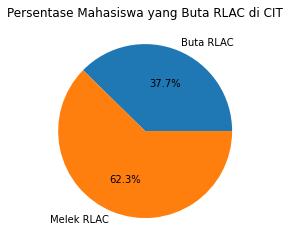

In [7]:
fig, ax = plt.subplots()
data = {"Buta RLAC" : buta,"Melek RLAC" : melek}
vis = pd.Series(data=data)
# Menampilkan Diagram Lingkaran
# Referensi: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

vis.plot(ax=ax, kind='pie', autopct='%1.1f%%', title="Persentase Mahasiswa yang Buta RLAC di CIT", ylabel='')
plt.show()

# **Masalah 1**


H0 : $\mu\le $ 0.75 </br>
H1 : $\mu\gt $ 0.75 </br>
Tingkat Signifikansi = 0.01

## Cara Manual

In [10]:
x_bar = np.mean(df1['Buta RLAC'])
print("Rata-rata sampel yang buta RLAC:", x_bar)

n = len(df1)
print("Jumlah data sampel:", n)

std_dev = df1['Buta RLAC'].std()
print("Standar deviasi sampel yang buta RLAC:", std_dev)

alpha = 0.01
print("Tingkat kepercayaan:", 1-alpha)

Rata-rata sampel yang buta RLAC: 0.3765432098765432
Jumlah data sampel: 162
Standar deviasi sampel yang buta RLAC: 0.48602113926325335
Tingkat kepercayaan: 0.99


In [11]:
statistik_man = (x_bar - 0.75)/(std_dev/(n**0.5))
print("Statistik:", statistik_man)
crit = stats.norm.ppf(0.99)
print(f"Critical region: ({crit},∞)")

Statistik: -9.780086778080644
Critical region: (2.3263478740408408,∞)


Karena statistik tidak ada di dalam critical region maka kesimpulan Uji Hipotesis : H0 tidak ditolak. <br>

Data tidak cukup signifikan untuk menyimpulkan apapun.

### Membalik Uji Hipotesis Masalah 1 Cara Manual

H0 : miu $\ge $ 0.75 </br>
H1 : miu $\lt $ 0.75 </br>
Tingkat Signifikansi = 0.01

In [12]:
statistik_man = (x_bar - 0.75)/(std_dev/(n**0.5))
print("Statistik:", statistik_man)
crit = stats.norm.ppf(0.99)
print(f"Critical region: (-∞,{crit})")

Statistik: -9.780086778080644
Critical region: (-∞,2.3263478740408408)


Karena statistik ada di dalam critical region maka kesimpulan Uji Hipotesis : H0 ditolak. <br>
Dengan tingkat kepercayaan 99%, Mahasiswa CIT yang tidak melek Liberal Arts tidak lebih dari 75%.

## Cara Modern

H0 : miu $\le $ 0.75 </br>
H1 : miu $\gt $ 0.75 </br>
Tingkat Signifikansi = 0.01

In [13]:
stat, pval = statsmodels.stats.weightstats.ztest(df['Buta RLAC'], value=0.75, alternative='larger')
print("Statistik:", stat)
print("P-value:", pval)

Statistik: -6.660562382406516
P-value: 0.9999999999863609


Karena P-Value (0.9999999999863609) > alpha (0.01). Maka H0 tidak ditolak. <br>
Data tidak cukup signifikan untuk menyimpulkan apapun.

### Membalik Uji Hipotesis Masalah 1 Cara Modern

H0 : miu $\ge $ 0.75 </br>
H1 : miu $\lt $ 0.75 </br>
Tingkat Signifikansi = 0.01

In [14]:
stat, pval = statsmodels.stats.weightstats.ztest(df['Buta RLAC'], value=0.75, alternative='smaller')
print("Statistik:", stat)
print("P-value:", pval)

Statistik: -6.660562382406516
P-value: 1.3639087576361523e-11


Karena P-Value (1.3639087576361523e-11) < alpha (0.01). Maka H0 ditolak dan H1 dapat dipertimbangkan.<br>
Dengan tingkat kepercayaan 99%, Mahasiswa CIT yang tidak melek Liberal Arts tidak lebih dari 75%. 

# **Masalah 2**

In [15]:
tanggal_pinjam = df['Tanggal Pinjam']
semester_apa = []
for i in tanggal_pinjam:
    tahun = i[-4:]
    if tahun == '2021':
        semester_apa.append('Ganjil')
    else:
        semester_apa.append('Genap')
semester_apa

['Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',
 'Ganjil',

In [16]:
df2 = df
df2['Semester'] = semester_apa
df2 = df2.groupby("Nama Anggota").min()
df2

,ID Anggota,Kode Eksemplar,Judul,Tanggal Pinjam,Tanggal Kembali,Status peminjaman,Buta RLAC,angkatan,Semester
Nama Anggota,,,,,,,,,
Aaron Arquette,212100246,1033,"Kalkulus, Jilid 1 = Calculus",10/1/2021,10/1/2021,1,0,21,Ganjil
Abrielle Irene Mirah,212100256,2147,Morfologi Tumbuhan,1/26/2022,2/9/2022,1,1,21,Genap
Adelaide Astrid Kusumawardhani,212100124,818,Brock Biology of Microorganisms,1/10/2022,1/24/2022,0,1,21,Genap
Alfa Marzelino,191900672,529,Depresi: Memandang Melampaui Kegelapan yang Su...,1/20/2022,10/12/2021,1,0,19,Ganjil
Alfred William Silele,212100709,2146,Morfologi Tumbuhan,2/2/2022,2/16/2022,1,1,21,Genap
...,...,...,...,...,...,...,...,...,...
Yabes Elmon,202000638,142,Allah Tritunggal,8/30/2021,9/13/2021,1,0,20,Ganjil
Yehezkiel Purnama Wijaya,10101190476,32,God's Fiery Challenger for Our Time: Festchrif...,8/25/2021,8/19/2021,1,0,19,Ganjil
Yolanda Charlota Thenu,202001260,746,Allah Tritunggal,1/25/2022,2/8/2022,0,0,20,Ganjil


In [17]:
semester_ganjil = df2['Buta RLAC'][df2["Semester"] == 'Ganjil']
semester_genap = df2['Buta RLAC'][df2["Semester"] == 'Genap']
proporsi_buta_RLAC_Ganjil = round(semester_ganjil.mean()*100,2)
proporsi_buta_RLAC_Genap = round(semester_genap.mean()*100,2)
proporsi_buta_RLAC_Genap

49.06

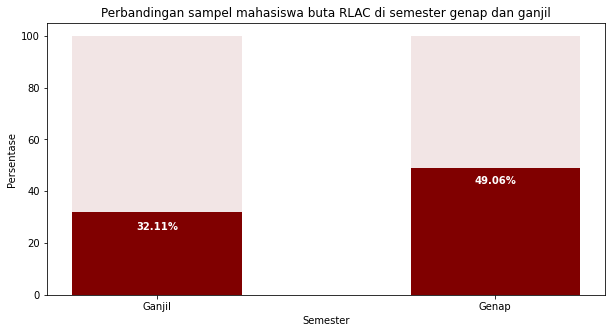

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Ganjil':proporsi_buta_RLAC_Ganjil, 'Genap':proporsi_buta_RLAC_Genap}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, [100,100], color ='maroon',alpha=0.1,
		width = 0.5)
plt.bar(courses, values, color ='maroon',
		width = 0.5)

plt.text("Ganjil",25,f"{proporsi_buta_RLAC_Ganjil}%",ha="center",color="white", weight="bold")
plt.text("Genap",43,f"{proporsi_buta_RLAC_Genap}%",ha="center",color="white", weight="bold")

plt.xlabel("Semester")
plt.ylabel("Persentase")
plt.title("Perbandingan sampel mahasiswa buta RLAC di semester genap dan ganjil")
plt.show()

In [19]:
semester_ganjil = df2['Buta RLAC'][df2["Semester"] == 'Ganjil']
semester_genap = df2['Buta RLAC'][df2["Semester"] == 'Genap']
print(f'Jumlah Mahasiswa yang meminjam pada Semester Ganjil = {semester_ganjil.shape[0]}')
print(f'Jumlah Mahasiswa yang meminjam pada Semester Genap = {semester_genap.shape[0]}')

Jumlah Mahasiswa yang meminjam pada Semester Ganjil = 109
Jumlah Mahasiswa yang meminjam pada Semester Genap = 53


In [20]:
x_ganjil = np.mean(semester_ganjil)
x_genap = np.mean(semester_genap)
std_ganjil = semester_ganjil.std()
std_genap = semester_genap.std()
n1_df2 = len(semester_ganjil)
n2_df2 = len(semester_genap)
print(f"Rata - Rata Semester Ganjil = {x_ganjil}")
print(f"Rata - Rata Semester Genap = {x_genap}")
print(f"Standar Deviasi Semester Ganjil = {x_ganjil}")
print(f"Standar Deviasi Semester Genap = {x_genap}")

Rata - Rata Semester Ganjil = 0.3211009174311927
Rata - Rata Semester Genap = 0.49056603773584906
Standar Deviasi Semester Ganjil = 0.3211009174311927
Standar Deviasi Semester Genap = 0.49056603773584906


## Cara Manual
Misalkan:<br>
X1 adalah mahasiswa CIT yang membaca buku non-prodinya pada semester ganjil<br>
X2 adalah mahasiswa CIT yang membaca buku non-prodinya pada semester genap

H0: $\mu1$ - $\mu2 \le$ 0 
<br>
H1: $\mu1$ - $\mu2 \gt$ 0

In [21]:
statistik_manual_df2 = (x_ganjil - x_genap) / (((std_ganjil**2)/n1_df2)+((std_genap**2)/n2_df2))**0.5
print("Hasil Statistik:", statistik_manual_df2)
crit = stats.norm.ppf(0.99)
print(f"Critical region:({crit} , ∞)")

Hasil Statistik: -2.051381175579928
Critical region:(2.3263478740408408 , ∞)


Karena Statistik ada di luar critical region maka kesimpulan Uji Hipotesis : H0 tidak ditolak<br>
Karena Hipotesis Null tidak ditolak, maka data tidak cukup signifikan untuk menyimpulkan apapun

### Membalik Uji Hipotesis Masalah 2 Cara Manual

H0: $\mu1$ - $\mu2 \ge$ 0 
<br>
H1: $\mu1$ - $\mu2 \lt$ 0

In [22]:
statistik_manual_df2 = (x_ganjil - x_genap) / (((std_ganjil**2)/n1_df2)+((std_genap**2)/n2_df2))**0.5
print("Hasil Statistik:", statistik_manual_df2)
crit = stats.norm.ppf(0.99)
print(f"Critical region:(-∞ , {crit})")

Hasil Statistik: -2.051381175579928
Critical region:(-∞ , 2.3263478740408408)


Karena statistik ada di dalam critical region maka kesimpulan Uji Hipotesis : H0 ditolak. <br>
Dengan tingkat kepercayaan 99%, rata-rata mahasiswa membaca buku diluar prodinya semester 1 tidak lebih besar dari semester 2.

## Cara Modern
Misalkan:<br>
X1 adalah mahasiswa CIT yang membaca buku non-prodinya pada semester ganjil<br>
X2 adalah mahasiswa CIT yang membaca buku non-prodinya pada semester genap

H0: $\mu1$ - $\mu2 \le$ 0 
<br>
H1: $\mu1$ - $\mu2 \gt$ 0

In [23]:
tstat, pval = statsmodels.stats.weightstats.ztest(semester_ganjil,semester_genap, value=0, alternative='larger')
print(f'Hasil Statistik = {tstat}')
print(f'P-Value = {pval}')

Hasil Statistik = -2.1042314806479245
P-Value = 0.9823208701422311


Karena P-Value (0.9823208701422311) >= alpha (0.01). Maka H0 tidak ditolak.<br>
Karena Hipotesis Null tidak ditolak, maka data tidak cukup signifikan untuk menyimpulkan apapun

H0: $\mu1$ - $\mu2 \ge$ 0 
<br>
H1: $\mu1$ - $\mu2 \lt$ 0

In [24]:
tstat, pval = statsmodels.stats.weightstats.ztest(semester_ganjil,semester_genap, value=0, alternative='smaller')
print(f'Hasil Statistik = {tstat}')
print(f'P-Value = {pval}')
the_alpha_ = 0.01
if (pval < the_alpha_):
    print('P Value < alpha (0.01)')
else:
    print('P Value >= alpha (0.01)')

Hasil Statistik = -2.1042314806479245
P-Value = 0.017679129857768823
P Value >= alpha (0.01)


Karena P-Value (0.017679129857768823) >= alpha (0.01). Maka H0 tidak ditolak.<br>
Karena Hipotesis Null tidak ditolak, maka data tidak cukup signifikan untuk menyimpulkan apapun

**Buat tingkat kepercayaan : alpha=0.02**

In [25]:
tstat, pval = statsmodels.stats.weightstats.ztest(semester_ganjil,semester_genap, value=0, alternative='smaller')
print(f'Hasil Statistik = {tstat}')
print(f'P-Value = {pval}')
the_alpha_ = 0.02
if pval <= the_alpha_:
    print('H0 Ditolak')

Hasil Statistik = -2.1042314806479245
P-Value = 0.017679129857768823
H0 Ditolak


Karena P-Value (0.017679129857768823) <= alpha (0.02). Maka H0 ditolak.<br>
Dengan tingkat kepercayaan 99%, rata-rata mahasiswa membaca buku diluar prodinya semester 1 tidak lebih besar dari semester 2.

# Masalah 3 Selisih rataan 2 populasi

In [26]:
df_th1 = pd.read_csv("angkatan_sulung.csv")
df_th1 = df_th1.groupby("Nama Anggota").min()
df_th1 = df_th1[["Buta RLAC"]]
df_th1.rename(columns={"Buta RLAC": "Buta RLAC tahun 1"}, inplace=True)
df_th1

,Buta RLAC tahun 1
Nama Anggota,
Alfa Marzelino,0
Anatasia Militiachristy Gabriella Sumirat,1
Angelia Austina,0
Badia Tuahman L Sihaloho,1
Bambang Prapta Aji Budiarja,0
Brandon Christopher,1
Charis Christopher Hulu,0
Christopher Kornelius Santoso,0
Christopher Owen Candlerson,0


In [27]:
df_th2 = df1[df1['angkatan'] == 19]
df_th2 = df_th2[["Buta RLAC"]]
df_th2.rename(columns={"Buta RLAC": "Buta RLAC tahun 2"}, inplace=True)
df_th2

,Buta RLAC tahun 2
Nama Anggota,
Alfa Marzelino,0
Aquilira Andahan,0
Badia Tuahman L Sihaloho,0
Brandon Christopher,0
Charis Christopher Hulu,1
Christeven Cohen,0
Christopher Kornelius Santoso,0
Christopher Owen Candlerson,0
Christyane Zabdi,0


In [28]:
df_pasangan = pd.concat([df_th1, df_th2], axis=1, join="inner")
df_pasangan

,Buta RLAC tahun 1,Buta RLAC tahun 2
Nama Anggota,,
Alfa Marzelino,0,0
Badia Tuahman L Sihaloho,1,0
Brandon Christopher,1,0
Charis Christopher Hulu,0,1
Christopher Kornelius Santoso,0,0
Christopher Owen Candlerson,0,0
Christyane Zabdi,0,0
Edgar Tigor,1,0
Elisabeth Victoria Sampolino,0,0


In [29]:
tidak_berubah = len(df_pasangan[(df_pasangan["Buta RLAC tahun 1"]==0) & (df_pasangan["Buta RLAC tahun 2"]==0)])
peningkatan_literasi = len(df_pasangan[(df_pasangan["Buta RLAC tahun 1"]==1) & (df_pasangan["Buta RLAC tahun 2"]==0)])
penurunan_literasi = len(df_pasangan[(df_pasangan["Buta RLAC tahun 1"]==0) & (df_pasangan["Buta RLAC tahun 2"]==1)])


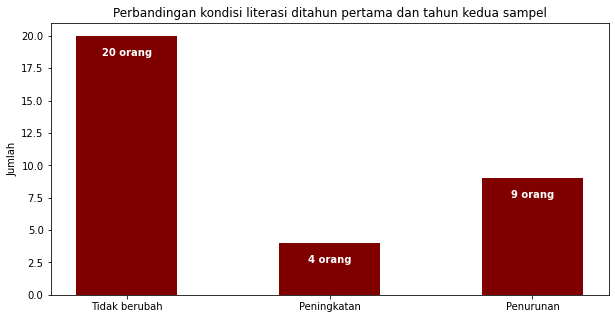

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Tidak berubah':tidak_berubah, 'Peningkatan':peningkatan_literasi,'Penurunan':penurunan_literasi}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.5)

plt.text("Tidak berubah",18.5,f"{tidak_berubah} orang",ha="center",color="white", weight="bold")
plt.text("Peningkatan",2.5,f"{peningkatan_literasi} orang",ha="center",color="white", weight="bold")
plt.text("Penurunan",7.5,f"{penurunan_literasi} orang",ha="center",color="white", weight="bold")

plt.ylabel("Jumlah")
plt.title("Perbandingan kondisi literasi ditahun pertama dan tahun kedua sampel")
plt.show()

## Cara Modern
X1 = mahasiswa tahun pertama
X2 = mahasiswa setelah tahun pertama

H0 : $ \mu d \le 0$ <br> 
H1 : $ \mu d \gt 0$ (mahasiswa mengalami peningkatan literasi liberal arts setelah tahun pertama) <br>
Tingkat signifikansi = 0.1

In [31]:
statistic, pvalue = stats.ttest_rel(df_pasangan.iloc[:, 0], df_pasangan.iloc[:, 1], alternative="greater")
print(f'Hasil Statistik = {statistic}')
print(f'P Value = {pvalue}')
print(f'Tingkat Signifikansi = {0.1}')
if pvalue > 0.1:
    print('H0 tidak ditolak')

Hasil Statistik = -1.4065622155408024
P Value = 0.9155474314301933
Tingkat Signifikansi = 0.1
H0 tidak ditolak


Karena hasil pvalue lebih besar dari tingkat signifikansi yang kita tetapkan, maka H0 tidak ditolak sehingga tidak dapat diambil kesimpulan dari hipotesis analisa ke-3. Maka kami mencoba untuk membalik hipotesis tersebut.

### Balik Hipotesis Cara Modern (Masalah 3)

X1 = mahasiswa tahun pertama
X2 = mahasiswa setelah tahun pertama

H0 : $ \mu \ge 0$ <br> 
H1 : $ \mu \lt 0$ (mahasiswa mengalami penurunan literasi liberal arts setelah tahun pertama) <br>
Tingkat signifikansi = 0.1

In [32]:
statistic, pvalue = stats.ttest_rel(df_pasangan.iloc[:, 0], df_pasangan.iloc[:, 1], alternative="less")
print(f'Hasil Statistik = {statistic}')
print(f'P Value = {pvalue}')
print(f'Tingkat Signifikansi = {0.1}')
if pvalue <= 0.1:
    print('H0 ditolak')

Hasil Statistik = -1.4065622155408024
P Value = 0.08445256856980668
Tingkat Signifikansi = 0.1
H0 ditolak


Setelah dibalik, ternyata pvalue lebih kecil dari tingkat signifikansi, sehingga H0 ditolak. Dengan demikian kesimpulan yang bisa diambil adalah mahasiswa CIT mengalami penurunan literasi liberal arts setelah tahun pertama.

## Cara Manual 
X1 = mahasiswa tahun pertama
X2 = mahasiswa setelah tahun pertama

H0 : $ \mu d\ge 0$ <br> 
H1 : $ \mu d\lt 0$ (mahasiswa mengalami penurunan literasi liberal arts setelah tahun pertama) <br>
Tingkat signifikansi = 0.1

In [37]:
statistik_manual_df3 = (d_bar - 0) / (s/(n ** 0.5))
print("Hasil Statistik:", statistik_manual_df3)
hasil_ppf = stats.t.ppf(0.99, n - 1)
print(f'Critical Region: ({hasil_ppf},∞)')

Hasil Statistik: -1.4065622155408024
Critical Region: (2.4447941998077973,∞)


Karena statistik tidak ada di dalam critical region maka kesimpulan Uji Hipotesis : H0 tidak ditolak. <br>

Maka dari itu, data tidak cukup signifikan untuk menyimpulkan apapun.

### Balik Hipotesis Cara Old (Masalah 3)

## Cara Manual 
X1 = mahasiswa tahun pertama
X2 = mahasiswa setelah tahun pertama

H0 : $ \mu d\le 0$ <br> 
H1 : $ \mu d\gt 0$ (mahasiswa mengalami penurunan literasi liberal arts setelah tahun pertama) <br>
Tingkat signifikansi = 0.1

In [33]:
df_selisih = df_pasangan.iloc[:, 0] - df_pasangan.iloc[:, 1]
d_bar = df_selisih.mean()
s = stats.tstd(df_selisih)
n = len(df_selisih)
print(d_bar)
print(s)
print(n)

-0.14705882352941177
0.6096373955153138
34


In [36]:
statistik_manual_df3 = (d_bar - 0) / (s/(n ** 0.5))
print("Hasil Statistik:", statistik_manual_df3)
hasil_ppf = stats.t.ppf(0.99, n - 1)
print(f'Critical Region: (-∞, {hasil_ppf})')

Hasil Statistik: -1.4065622155408024
Critical Region: (-∞, 2.4447941998077973)


Karena statistik ada di dalam critical region maka kesimpulan Uji Hipotesis : H0 ditolak. <br>

Maka dari itu, H1 dapat dipertimbangkan. Dengan demikian kesimpulan yang bisa diambil adalah mahasiswa CIT mengalami penurunan literasi liberal arts setelah tahun pertama.  